In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn
import cv2
import PIL.Image as Image
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
image_df = pd.read_csv('/content/ckextended.csv')
image_df.head()

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [3]:
image_df['emotion'].value_counts()

6    593
5     83
3     69
1     59
0     45
4     28
2     25
7     18
Name: emotion, dtype: int64

In [4]:
classes = ["Anger","Disgust","Fear","Happiness","Sadness","Surprise","Neutral","Contempt"]

In [5]:
image_df['Usage'].value_counts()

Training       734
PrivateTest     95
PublicTest      91
Name: Usage, dtype: int64

In [37]:
images=[]
labels=[]

In [30]:
total = image_df.shape[0]

In [10]:
def string_to_image(pixel_string, width, height):
    pixels = np.array(pixel_string.split(), dtype=np.uint8)
    return pixels.reshape((height, width))

In [38]:
IMAGE_SHAPE = (48, 48)
for i in range(total):
    pixel_string = image_df['pixels'].iloc[i]
    emotion = image_df['emotion'].iloc[i]
    width, height = (IMAGE_SHAPE)
    image_data = string_to_image(pixel_string, width, height)
    images.append(image_data)
    labels.append(emotion)
    #plt.subplot(1, 4, i + 1)
    #plt.imshow(image_data, cmap='gray')
    #plt.title(f'Emotion: {classes[emotion]}')
    #plt.axis('off')

#plt.show()

In [39]:
labels = np.array(labels)
images = np.array(images)

In [40]:
images = images/255

In [42]:
num_of_classes=8
labels_encoded = keras.utils.to_categorical(labels,num_classes = num_of_classes)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(images,labels_encoded,test_size=0.2,random_state=10)

In [46]:
print(X_train.shape,' ',X_test.shape)

(736, 48, 48)   (184, 48, 48)


In [49]:
classifier_model = keras.models.Sequential(
    [
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(8,activation='softmax')
    ]
)

In [50]:
classifier_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
classifier_model.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
23/23 [==============================] - 5s 126ms/step - loss: 1.4351 - accuracy: 0.6250
Epoch 2/50
23/23 [==============================] - 4s 157ms/step - loss: 1.3332 - accuracy: 0.6440
Epoch 3/50
23/23 [==============================] - 3s 111ms/step - loss: 1.3134 - accuracy: 0.6440
Epoch 4/50
23/23 [==============================] - 2s 93ms/step - loss: 1.2808 - accuracy: 0.6440
Epoch 5/50
23/23 [==============================] - 2s 94ms/step - loss: 1.2192 - accuracy: 0.6454
Epoch 6/50
23/23 [==============================] - 2s 93ms/step - loss: 1.0322 - accuracy: 0.6957
Epoch 7/50
23/23 [==============================] - 2s 100ms/step - loss: 0.8367 - accuracy: 0.7663
Epoch 8/50
23/23 [==============================] - 4s 167ms/step - loss: 0.6736 - accuracy: 0.8152
Epoch 9/50
23/23 [==============================] - 3s 140ms/step - loss: 0.6062 - accuracy: 0.8370
Epoch 10/50
23/23 [==============================] - 2s 98ms/step - loss: 0.4974 - accuracy: 0.8533
Epo

In [52]:
classifier_model.evaluate(X_test,y_test)

6/6 [==============================] - 1s 28ms/step - loss: 0.3357 - accuracy: 0.9293


[0.33571913838386536, 0.929347813129425]

In [68]:
y_predictions = classifier_model.predict(X_test)
y_predictions = [np.argmax(i) for i in y_predictions]
y_actual = [np.argmax(i) for i in y_test]

6/6 [==============================] - 0s 26ms/step


In [53]:
classifier_model.save('/content/emotion_detection_model.sav')

In [69]:
print(classification_report(y_predictions,y_actual))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.91      0.91        11
           2       0.50      0.50      0.50         4
           3       1.00      1.00      1.00        14
           4       0.40      1.00      0.57         2
           5       1.00      1.00      1.00        20
           6       0.99      0.95      0.97       124
           7       0.33      0.33      0.33         3

    accuracy                           0.93       184
   macro avg       0.70      0.80      0.73       184
weighted avg       0.94      0.93      0.93       184



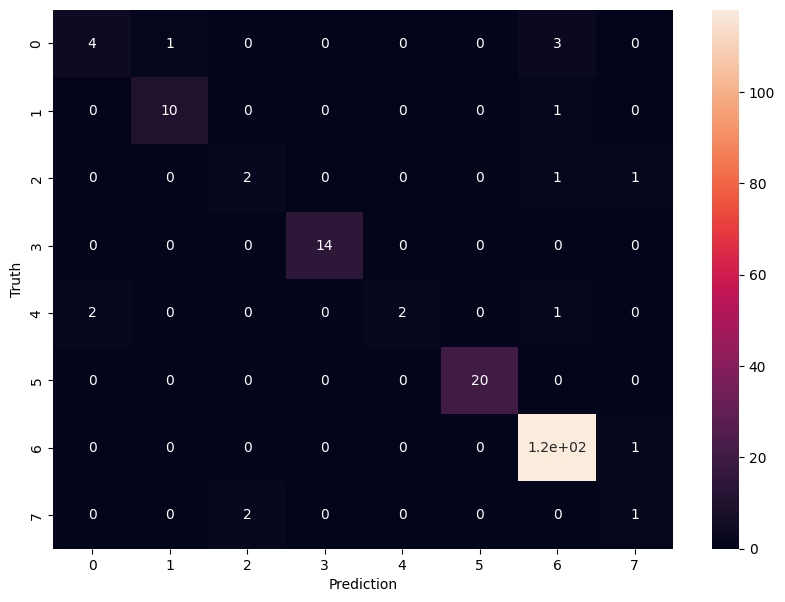

In [73]:
cm = confusion_matrix(y_actual,y_predictions)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()